<a href="https://colab.research.google.com/github/LayneV/CS4410/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install face_recognition
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from google.colab import drive

In [74]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
known_image_dir = "/content/drive/MyDrive/known"
unknown_image_dir = "/content/drive/MyDrive/unknown"

In [76]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img,(width,height))

In [77]:
known_encodings = []
known_names = []
known_dir = "/content/drive/MyDrive/known"

In [78]:
for file in os.listdir(known_dir):
  img = read_img(known_image_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

In [79]:
known_encodings

[array([-0.1284592 ,  0.0575909 ,  0.0244506 ,  0.01051021, -0.23261115,
         0.02872099, -0.03911398, -0.07219617,  0.08497578, -0.01901845,
         0.29013997, -0.04598808, -0.26682964, -0.02555381, -0.06601816,
         0.0970201 , -0.11928965, -0.16175625, -0.07309974, -0.11003623,
         0.03731499,  0.02752826, -0.0454411 ,  0.04621358, -0.15503576,
        -0.33943069, -0.02085508, -0.04922978,  0.03433765, -0.22874977,
         0.06796757,  0.15772268, -0.18915768, -0.0359087 ,  0.05881555,
         0.14951874, -0.03727955, -0.01927426,  0.22665557, -0.003294  ,
        -0.15520592,  0.06329605,  0.05710729,  0.32693422,  0.16765219,
         0.01572566, -0.02398266, -0.00504658,  0.1190619 , -0.33479345,
         0.01300111,  0.22792248,  0.15300936,  0.0375993 , -0.00968543,
        -0.10296354, -0.0526101 ,  0.12996322, -0.16411084,  0.12176152,
         0.08426429, -0.18840829, -0.06718859, -0.13094519,  0.1829596 ,
         0.06228093, -0.14786564, -0.11115669,  0.1

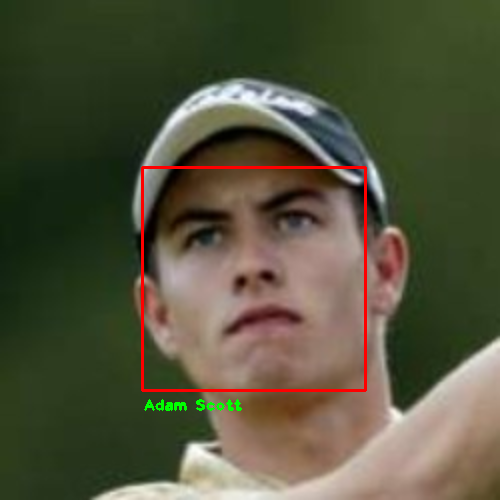

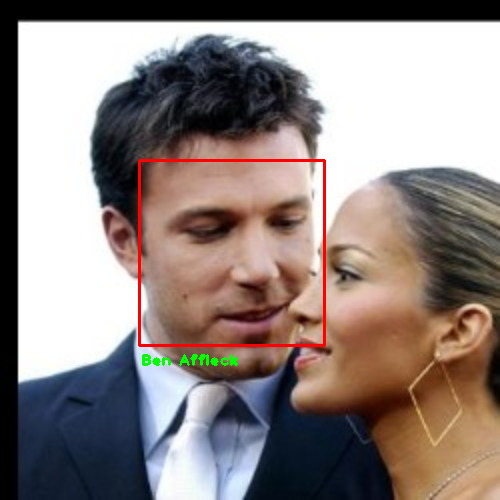

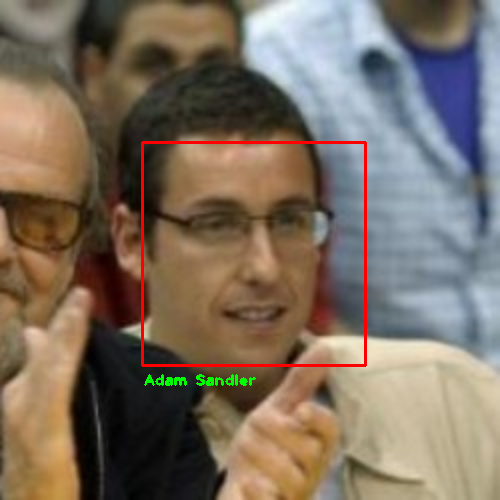

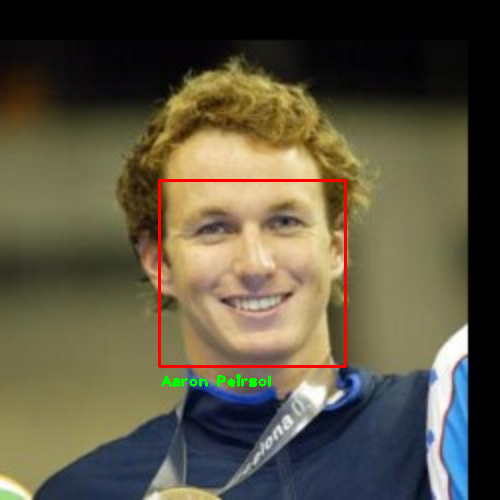

In [84]:
unkown_dir= 'unknown'
for file in os.listdir(unknown_image_dir):
  img = read_img(unknown_image_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),2)
      cv2_imshow(img)
  #print(results)